In [1]:
import pandas as pd
df= pd.read_csv("stocks.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,9/28/2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,9/27/2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,9/26/2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,9/25/2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,9/24/2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [2]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [3]:
df1=df.reset_index()['Close']
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

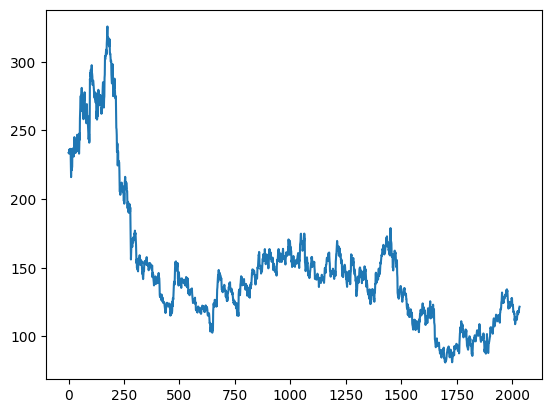

In [4]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [5]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [6]:
df1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [7]:
train=int(len(df1)*0.7)
test=len(df1)-train
train_data,test_data=df1[0:train,:],df1[train:,:1]

In [8]:
train,test
test_data

array([[0.32148693],
       [0.32352941],
       [0.3255719 ],
       [0.32638889],
       [0.33496732],
       [0.34395425],
       [0.3441585 ],
       [0.34599673],
       [0.35866013],
       [0.35580065],
       [0.37214052],
       [0.36294935],
       [0.3754085 ],
       [0.36315359],
       [0.34640523],
       [0.34579248],
       [0.34844771],
       [0.35784314],
       [0.34722222],
       [0.33353758],
       [0.33537582],
       [0.33680556],
       [0.33680556],
       [0.32271242],
       [0.32638889],
       [0.3188317 ],
       [0.33986928],
       [0.37765523],
       [0.3999183 ],
       [0.36968954],
       [0.35886438],
       [0.35927288],
       [0.35294118],
       [0.32107843],
       [0.31413399],
       [0.31740196],
       [0.31597222],
       [0.32209967],
       [0.28267974],
       [0.28492647],
       [0.27389706],
       [0.28778595],
       [0.30187908],
       [0.31045752],
       [0.32128268],
       [0.31454248],
       [0.33129085],
       [0.332

In [9]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [10]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [11]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [12]:
X_test

array([[[0.32148693],
        [0.32352941],
        [0.3255719 ],
        ...,
        [0.20506536],
        [0.2005719 ],
        [0.18831699]],

       [[0.32352941],
        [0.3255719 ],
        [0.32638889],
        ...,
        [0.2005719 ],
        [0.18831699],
        [0.18811275]],

       [[0.3255719 ],
        [0.32638889],
        [0.33496732],
        ...,
        [0.18831699],
        [0.18811275],
        [0.17034314]],

       ...,

       [[0.13827614],
        [0.13541667],
        [0.13010621],
        ...,
        [0.14562908],
        [0.15236928],
        [0.15400327]],

       [[0.13541667],
        [0.13010621],
        [0.12254902],
        ...,
        [0.15236928],
        [0.15400327],
        [0.14971405]],

       [[0.13010621],
        [0.12254902],
        [0.12479575],
        ...,
        [0.15400327],
        [0.14971405],
        [0.1621732 ]]])

In [13]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [16]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
21/21 [==============================] - 20s 463ms/step - loss: 0.0197 - val_loss: 0.0058
Epoch 2/100
21/21 [==============================] - 7s 331ms/step - loss: 0.0027 - val_loss: 6.6262e-04
Epoch 3/100
21/21 [==============================] - 7s 341ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 4/100
21/21 [==============================] - 7s 327ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 5/100
21/21 [==============================] - 6s 301ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 6/100
21/21 [==============================] - 7s 322ms/step - loss: 0.0014 - val_loss: 9.6377e-04
Epoch 7/100
21/21 [==============================] - 7s 325ms/step - loss: 0.0013 - val_loss: 9.9661e-04
Epoch 8/100
21/21 [==============================] - 7s 322ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 9/100
21/21 [==============================] - 7s 321ms/step - loss: 0.0011 - val_loss: 8.9476e-04
Epoch 10/100
21/21 [==============================] - 7s 324ms/step - loss

21/21 [==============================] - 7s 319ms/step - loss: 3.1875e-04 - val_loss: 3.5772e-04
Epoch 77/100
21/21 [==============================] - 7s 319ms/step - loss: 3.5039e-04 - val_loss: 4.6363e-04
Epoch 78/100
21/21 [==============================] - 7s 316ms/step - loss: 2.8692e-04 - val_loss: 3.1414e-04
Epoch 79/100
21/21 [==============================] - 7s 318ms/step - loss: 2.5126e-04 - val_loss: 2.5265e-04
Epoch 80/100
21/21 [==============================] - 7s 317ms/step - loss: 2.4310e-04 - val_loss: 2.7465e-04
Epoch 81/100
21/21 [==============================] - 7s 318ms/step - loss: 2.6580e-04 - val_loss: 2.7985e-04
Epoch 82/100
21/21 [==============================] - 7s 320ms/step - loss: 2.5008e-04 - val_loss: 2.3556e-04
Epoch 83/100
21/21 [==============================] - 7s 319ms/step - loss: 2.4865e-04 - val_loss: 2.6015e-04
Epoch 84/100
21/21 [==============================] - 7s 319ms/step - loss: 3.0298e-04 - val_loss: 3.5482e-04
Epoch 85/100
21/21 [===

In [19]:
### Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

16/16 [==============================] - 1s 70ms/step


In [20]:
# RMSE
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.014782978008224932

In [21]:
math.sqrt(mean_squared_error(y_test,test_predict))

0.013081806495482348

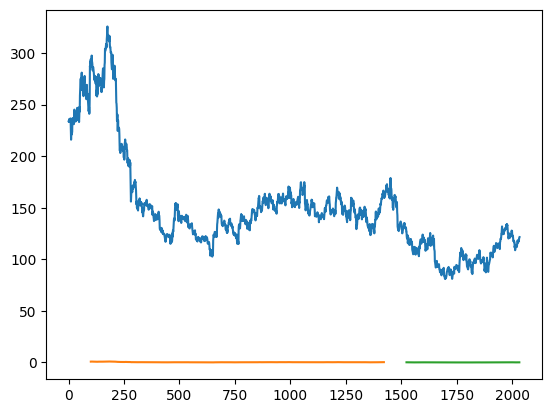

In [22]:
# Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# print(testPredictPlot)
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()